<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Aim" data-toc-modified-id="Aim-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Aim</a></span></li><li><span><a href="#model-equations" data-toc-modified-id="model-equations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>model equations</a></span></li><li><span><a href="#env" data-toc-modified-id="env-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>env</a></span></li><li><span><a href="#analytical-solutions" data-toc-modified-id="analytical-solutions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>analytical solutions</a></span></li></ul></div>

# Aim

Solving model of 4 variations: (P+B/P-only)vs(harvest/no)

# model equations
Four versions of a carbon harvest model has been developed from the same frame:

harvest | P+B | P-only
--- | --- | ---
yes | (1) | (2)
no | (3) | (4)

Full model (P+B, harvest)
\begin{equation}\left\{\begin{array}{rl}
    C'(t) &= e_{PR}(1-e_P)\cdot g_P\cdot P + a_P\cdot P^2 +(e_{BR}(1- e_B)-1)\cdot g_B\cdot C\cdot B +m_B\cdot B -xC\\
    P'(t) &= e_{PR}\cdot e_P\cdot g_P\cdot P - a_P\cdot P^2\\
    B'(t) &= e_{BR}\cdot e_B\cdot g_B\cdot C\cdot B - m_B\cdot B
\end{array}\right.\end{equation}

P-only, harvest
\begin{equation}\left\{\begin{array}{rl}
    C'(t) &= e_{PR}(1-e_P)\cdot g_P\cdot P + a_P\cdot P^2 -xC\\
    P'(t) &= e_{PR}\cdot e_P\cdot g_P\cdot P - a_P\cdot P^2\\
\end{array}\right.\end{equation}

P+B, no harvest
\begin{equation}\left\{\begin{array}{rl}
    C'(t) &= e_{PR}(1-e_P)\cdot g_P\cdot P + a_P\cdot P^2 +(e_{BR}(1- e_B)-1)\cdot g_B\cdot C\cdot B +m_B\cdot B\\
    P'(t) &= e_{PR}\cdot e_P\cdot g_P\cdot P - a_P\cdot P^2\\
    B'(t) &= e_{BR}\cdot e_B\cdot g_B\cdot C\cdot B - m_B\cdot B
\end{array}\right.\end{equation}

P-only, no harvest
\begin{equation}\left\{\begin{array}{rl}
    C'(t) &= e_{PR}(1-e_P)\cdot g_P\cdot P + a_P\cdot P^2\\
    P'(t) &= e_{PR}\cdot e_P\cdot g_P\cdot P - a_P\cdot P^2\\
\end{array}\right.\end{equation}

In the above model versions,

1. C'(t) contain [B] terms in P+B setting only; contain the $xC$ term in "harvest" setting only
0. P'(t) unchanged
0. B'(t) appear when a system has included bacteria

# env
Sympy (v1.5.1), Scipy (v1.2.3)

In [1]:
from sympy import *
import scipy as sc
init_printing()
x, ePR,eP,gP,aP, eBR,eB,gB,mB = var("x, e_{PR},e_P,g_P,a_P, e_{BR},e_B,g_B,m_B", positive=True)
C,P,B = var("C,P,B", real=True)

model equations

In [2]:
dP = ePR*eP*gP*P - aP*P**2
dB = eBR*eB*gB*C*B - mB*B
dC1 = ePR*(1-eP)*gP*P + aP*P**2 + (eBR*(1-eB)-1)*gB*C*B + mB*B - x*C
dC2 = ePR*(1-eP)*gP*P + aP*P**2 - x*C
dC3 = ePR*(1-eP)*gP*P + aP*P**2 + (eBR*(1-eB)-1)*gB*C*B + mB*B
dC4 = ePR*(1-eP)*gP*P + aP*P**2

# analytical solutions
P+B, harvest

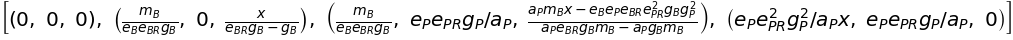

In [3]:
solve([Eq(dC1,0),Eq(dP,0),Eq(dB,0)], [C,P,B])

. | ..............C.............. | ..............P.............. | ............................B............................
--- | --- | --- | ---
[1] | 0 | 0 | 0
[2] | $\dfrac{m_B}{e_B e_{BR} g_B}$ | 0 | $\dfrac{x}{g_B(e_{BR}-1)}$
[3] | $\dfrac{e_P(e_{PR}g_P)^2}{a_P x}$ | $\dfrac{e_P e_{PR}g_P}{a_P}$ | 0
[4] | $\dfrac{m_B}{e_B e_{BR} g_B}$ | $\dfrac{e_P e_{PR}g_P}{a_P}$ | $\dfrac{a_P m_B x - (e_{PR}g_P)^2 e_B e_{BR} g_B}{a_P g_B m_B(e_{BR}-1)}$

P-only, harvest

In [4]:
solve([Eq(dC2,0),Eq(dP,0)], [C,P])

. | ..............C.............. | P
--- | --- | ---
[1] | 0 | 0
[2] = eqm[1.3] | $\dfrac{e_P(e_{PR}g_P)^2}{a_P x}$ | $\dfrac{e_P e_{PR}g_P}{a_P}$

P+B, no harvest

In [5]:
solve([Eq(dC3,0),Eq(dP,0),Eq(dB,0)], [C,P,B])

no harvest = all dead? Is that logical?

Or is it hinting that ecosystem must be replaced by others until the climax ecosystem, which have some sort of carbon capture (hence equal to harvest) ability?

P-only, no harvest

In [6]:
solve([Eq(dC4,0),Eq(dP,0)], [C,P])

where are the dead phytoplanktons in the solution?

It is mathematically correct but clearly biologically inaccurate